In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\PC\OneDrive\Desktop\Data\Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df=df.replace({'female':'Female','male':'Male'})

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",Male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",Female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",Female,58.0,0,0,113783,26.5500,C103,S


In [8]:
df=df.drop_duplicates()


In [9]:
df['Age'].fillna(df['Age'].median(), inplace=True)


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",Male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",Female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",Female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",Female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",Male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",Female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",Female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
# saving file as csv
df.to_csv('G:\EDA\Titaniic-Dataset.csv')

# **EDA**

In [13]:
survival_rate = df['Survived'].value_counts(normalize=True) * 100    
print(survival_rate)

Survived
1    67.213115
0    32.786885
Name: proportion, dtype: float64


In [14]:
# survial and dead according to gender
gender_survival_rate = df.groupby('Sex')['Survived'].value_counts(normalize=True) * 100
print(gender_survival_rate)

Sex     Survived
Female  1           93.181818
        0            6.818182
Male    0           56.842105
        1           43.157895
Name: proportion, dtype: float64


<Axes: xlabel='Survived', ylabel='count'>

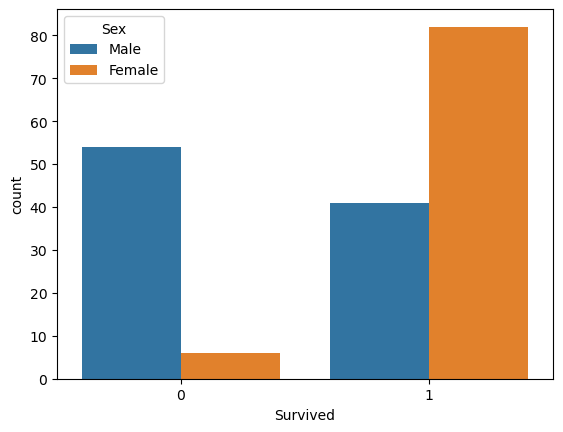

In [15]:
sns.countplot(x='Survived', hue='Sex', data=df)

In [16]:
(df.groupby('Pclass')['Survived'].mean()*100).round(1)

Pclass
1    67.1
2    80.0
3    50.0
Name: Survived, dtype: float64

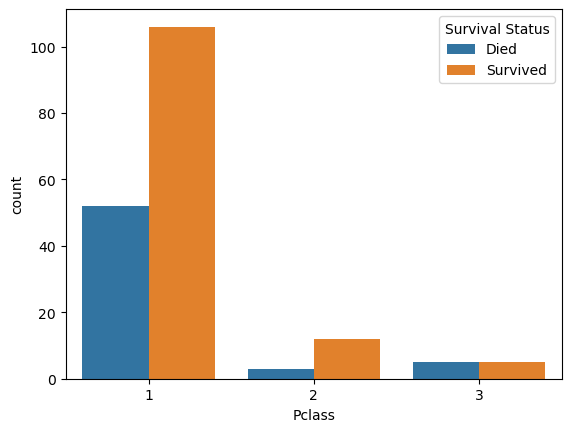

In [17]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.legend(title='Survival Status', labels=['Died', 'Survived'])


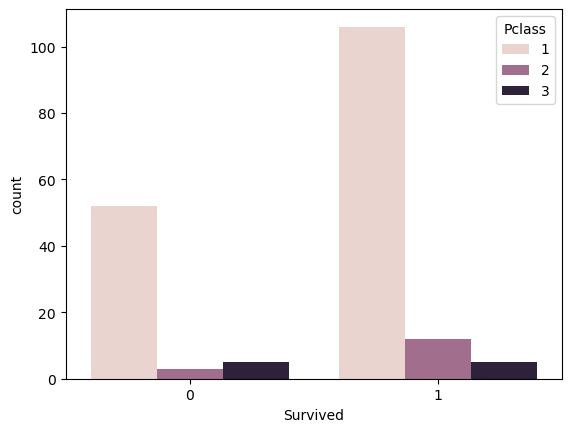

In [18]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.legend=['Died', 'Survived']